In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [4]:
#pd.read_excel('Homework/model_returns.xls')

In [7]:
eeg=np.loadtxt('Homework/EEG.txt')

In [2]:
def standartize(data):
    std=data.std(ddof=1)
    mean=data.mean()
    z_scores=(data-mean)/std
    return z_scores

In [16]:
z_eeg=standartize(eeg)

In [19]:
min=np.min(z_eeg)
max=np.max(z_eeg)

In [46]:
np.linspace(min, max, 11)

array([-2.70781518, -2.18173978, -1.65566439, -1.12958899, -0.60351359,
       -0.0774382 ,  0.4486372 ,  0.97471259,  1.50078799,  2.02686339,
        2.55293878])

In [38]:
st.norm.cdf(-2.12)

0.017003022647632787

In [49]:
def chi_norm_test(data, intervals, stand=True):
    if not stand: data=standartize(data)
    
    breaks=np.linspace(np.min(data), np.max(data), intervals+1)
    areas=[]
    chis=[]
    for i in range(len(breaks[:-1])):
        if i==0:
            freq=len(data[data<breaks[i+1]])/len(data)
            theoretical=st.norm.cdf(breaks[i+1])
            areas.append(theoretical)
            
            chi=(freq-theoretical)**2/theoretical
            chis.append(chi)
        elif i==(len(breaks[:-1])-1):
            freq=len(data[data>breaks[i]])/len(data)
            theoretical=1-sum(areas)
            
            chi=(freq-theoretical)**2/theoretical
            chis.append(chi)
        else:
            freq=len(data[np.logical_and(data>breaks[i], data<breaks[i+1])])/len(data)
            #print(sum(areas))
            theoretical=st.norm.cdf(breaks[i+1])-sum(areas)
            areas.append(theoretical)
            
            chi=(freq-theoretical)**2/theoretical
            chis.append(chi)
        print(freq, theoretical, chi)
    chi_stat=sum(chis)
    df=intervals-2-1
    p_val=1-st.chi2.cdf(chi_stat ,df)
    return chi_stat, p_val

In [63]:
def chi_norm_test(data, intervals, stand=True):
    if not stand: data=standartize(data)
    
    print(len(data))
    breaks=np.linspace(np.min(data), np.max(data), intervals+1)
    areas=[]
    chis=[]
    for i in range(len(breaks[:-1])):
        if i==0:
            freq=len(data[data<breaks[i+1]])
            theoretical=(st.norm.cdf(breaks[i+1]))*len(data)
            areas.append(theoretical/len(data))
            
            chi=(freq-theoretical)**2/theoretical
            chis.append(chi)
        elif i==(len(breaks[:-1])-1):
            freq=len(data[data>breaks[i]])
            theoretical=(1-sum(areas))*len(data)
            
            chi=(freq-theoretical)**2/theoretical/len(data)
            chis.append(chi)
        else:
            freq=len(data[np.logical_and(data>breaks[i], data<breaks[i+1])])
            theoretical=(st.norm.cdf(breaks[i+1])-sum(areas))*len(data)
            areas.append(theoretical/len(data))
            
            chi=(freq-theoretical)**2/theoretical
            chis.append(chi)
        print(freq, theoretical, chi)
    chi_stat=sum(chis)
    df=intervals-2-1
    p_val=1-st.chi2.cdf(chi_stat ,df)
    return chi_stat, p_val

In [101]:
chi_norm_test(z_eeg, 10)

(0.026656789113462108, 0.999999976741737)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Dmitry\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


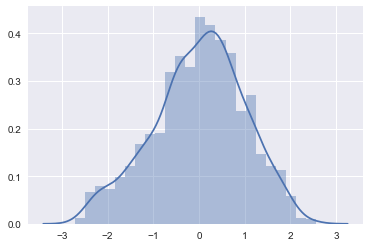

In [103]:
sns.set()
_=sns.distplot(z_eeg)
plt.show()

In [6]:
model_stock=pd.read_excel('Homework/model_returns.xls')

In [23]:
stocks=pd.read_excel('Homework/Stocks.xls')

In [83]:
stocks.head()

,AA,AA_ret,AXP,AXP_ret,BA,BA_ret,C,C_ret,CAT,CAT_ret,...,HD,HD_ret,HON,HON_ret,HPQ,HPQ_ret,IBM,IBM_ret,INTC,INTC_return
0,14.97,0.043144,17.40,-0.002301,49.74,0.023839,14.22,0.013967,31.71,0.023684,...,9.96,-0.005033,15.07,-0.003989,12.02,0.008285,18.24,0.008734,3.96,-0.002528
1,15.63,-0.001921,17.36,0.011455,50.94,-0.001179,14.42,0.005533,32.47,0.004916,...,9.91,-0.006073,15.01,0.011262,12.12,-0.005792,18.40,-0.005450,3.95,0.007566
2,15.60,-0.005141,17.56,0.044006,50.88,-0.001180,14.50,-0.008310,32.63,0.003365,...,9.85,-0.003050,15.18,0.003288,12.05,0.018093,18.30,0.015185,3.98,0.012485
3,15.52,-0.001935,18.35,-0.008758,50.82,-0.009490,14.38,-0.002786,32.74,-0.003365,...,9.82,0.014156,15.23,-0.007249,12.27,0.011345,18.58,0.005368,4.03,0.014779
4,15.49,0.033019,18.19,0.002197,50.34,-0.001193,14.34,0.022070,32.63,0.013394,...,9.96,0.010984,15.12,0.018349,12.41,0.014400,18.68,0.014350,4.09,0.009732


C:\Users\Dmitry\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


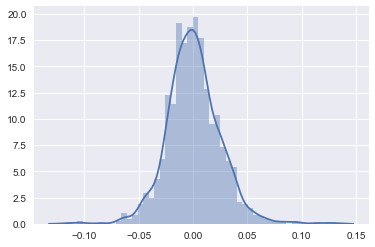

In [82]:
sns.distplot(stocks['AA_ret'].values[:-1])

In [55]:
AA_std=standartize(stocks['AA_ret'].values[:-1])

In [64]:
chi_norm_test(AA_std, 10)

1352
3 0.11371626928350025 73.2580643621897
3 3.888620398601431 0.20306590303712024
45 51.12273798639111 0.7332925020560507
223 258.88999436594264 4.975440239558539
602 510.505563169494 16.397925066591498
355 394.1075480912471 3.8806674094836313
99 118.85960617028095 3.318233754481984
14 13.881567011090315 0.0010104315205102994
5 0.6201168895691467 30.93509688853328
3 0.010529648099790734 0.6277662340239367


(134.33056279147624, 0.0)

In [62]:
(3-0.11)**2/0.11

75.92818181818181

C:\Users\Dmitry\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


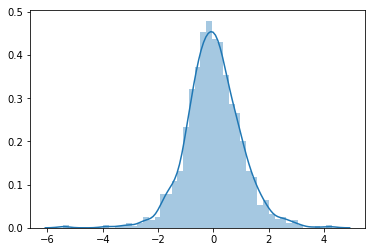

In [69]:
sns.distplot(standartize(stocks['CAT_ret'].values[:-1]))

In [68]:
chi_norm_test(stocks['CAT_ret'].values[:-1], 10, stand=False)

1352
2 0.005559045775525183 715.5535105324866
2 0.32313676971735494 8.701796132744244
10 7.668504715992285 0.7088566103394291
57 74.52696926603437 4.12192599105888
265 299.586677854959 3.992962215836099
594 502.0258506156412 16.85021626795245
320 351.856419799127 2.884220452756196
79 102.9050370684495 5.55318586459312
20 12.469288293571907 4.5481039069863165
3 0.6325565707317571 0.006553648693720199


(762.921331623447, 0.0)

In [114]:
model_stock.tail()

,0.5_brown,0.5_noise,0.7_brown,0.7_noise,0.3_brown,0.3_noise
1019,-0.779248,-0.047877,0.982814,0.009219,-1.151537,0.146106
1020,-0.827125,0.027235,0.992034,NaN,-1.005430,0.056902
1021,-0.799890,0.007225,NaN,NaN,-0.948529,NaN
1022,-0.792665,-0.009442,NaN,NaN,NaN,NaN
1023,-0.802107,NaN,NaN,NaN,NaN,NaN


C:\Users\Dmitry\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


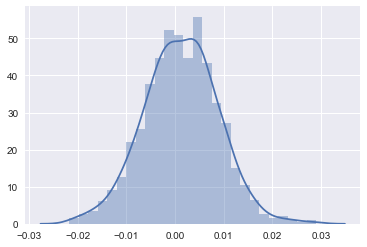

In [115]:
sns.distplot(model_stock['0.7_noise'].values[:-4])

In [65]:
chi_norm_test(model_stock['0.7_noise'].values[:-4], 10, stand=False)

1020
13 9.867287088747116 0.9945884918583663
36 38.0460537635619 0.11003338294693851
108 111.19114752824872 0.09158483182719886
219 212.37573198095495 0.20661930804823814
247 265.21866582645634 1.251494812636141
235 216.5884111315398 1.5651188486503653
117 115.64764199722364 0.015814176027187477
32 40.35745319981998 1.73070940927196
8 9.198206501304636 0.1560846475413509
5 1.50940098214295 0.007913983205473499


(6.12996189201322, 0.5246591107121024)

1023
18 12.825023122475006 2.0881354697901076
42 44.71139670070487 0.1644250148973168
108 121.6525690052931 1.5321718395949366
220 219.19353235161964 0.002967195523090652
299 261.6350165451323 5.336219925828238
191 206.90668185920782 1.2228823423992827
98 108.39245605649279 0.9964083001297045
31 37.600767274696246 1.158756370485604
12 8.631776339614163 1.3143216621956728
4 1.4507807447640482 0.004378617050282292
(13.820666737894234, 0.05446446136697869)


C:\Users\Dmitry\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


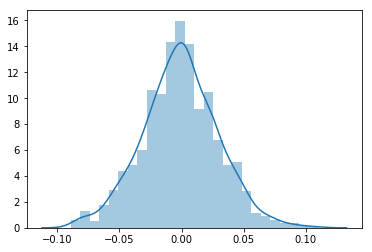

In [66]:
_=sns.distplot(model_stock['0.5_noise'].values[:-1])
print(chi_norm_test(model_stock['0.5_noise'].values[:-1], 10, stand=False))

1024
25 15.366943782670605 6.038661519076738
56 24.104786228490696 42.20343013570773
50 48.608907456263125 0.039810367410160565
103 83.56623527848069 4.519423544602629
34 122.47749175124159 63.91596067700877
64 153.03753394342084 51.802209866089086
160 163.02689041688103 0.056199720011696375
227 148.0611456704687 42.08627925065302
174 114.64155653459329 30.73427225818139
131 151.10850893748943 0.0026131892332150615
(241.39886052797445, 0.0)


C:\Users\Dmitry\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


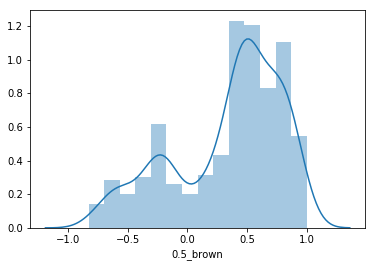

In [67]:
_=sns.distplot(model_stock['0.5_brown'])
print(chi_norm_test(model_stock['0.5_brown'], 10, stand=False))

C:\Users\Dmitry\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


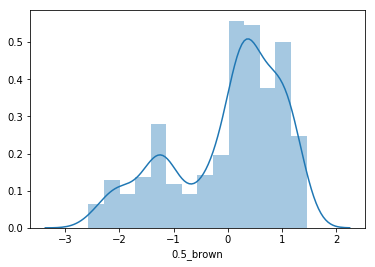

In [22]:
sns.distplot(standartize((model_stock['0.5_brown'])))

In [45]:
chi_norm_test(stocks['AA'],20, stand=False)

0.04360679970436068 0.09999410422615906 0.031797155800734105
0.1729490022172949 0.03520723108577539 0.538889169336392
0.10643015521064302 0.042884021765707214 0.09416353479772549
0.07982261640798226 0.05058379134169588 0.01690084646842596
0.018477457501847747 0.057780261023531454 0.026734222679177203
0.0029563932002956393 0.06391457274826007 0.058138535454780545
0.011086474501108648 0.06846562255822053 0.0480878798547441
0.014781966001478197 0.07102275619312087 0.0445353947230611
0.016260162601626018 0.0713468454757536 0.042532260674453426
0.06356245380635625 0.06940716794304036 0.0004921780322111594
0.08130081300813008 0.06538620966582842 0.0038735170739704664
0.07686622320768663 0.05965135111169806 0.004968065530088709
0.06208425720620843 0.052699522428544254 0.0016712342501114454
0.06577974870657798 0.04508637632759893 0.009497673028847235
0.050997782705099776 0.03735392327844311 0.00498354345985921
0.06651884700665188 0.029969488393322807 0.0445738544987428
0.03547671840354767 0.02

(0.9975700593180583, 0.9999999854678684)

In [43]:
(0.021433850702143386-0.12169483377179152)**2

0.01005226472609227

(array([295., 253.,  29.,  35., 108., 214., 173., 159.,  70.,  17.]),
 array([-1.4610346 , -1.10213572, -0.74323685, -0.38433798, -0.0254391 ,
         0.33345977,  0.69235865,  1.05125752,  1.41015639,  1.76905527,
         2.12795414]),
 <a list of 10 Patch objects>)

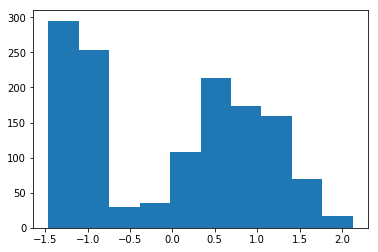

In [30]:
plt.hist(standartize(stocks['AA']))